In [1]:
from functools import partial

import matplotlib.pyplot as plt
from superfv import AdvectionSolver, plot_1d_slice
from superfv.initial_conditions import composite

In [2]:
N = 256
T = 100

configs = {
    "MUSCL-Hancock": dict(
        p=1, MUSCL=True, flux_recipe=2, MUSCL_limiter="moncen", SED=True
    ),
    r"MM2": dict(
        p=2,
        MOOD=True,
        cascade="muscl",
        blend=True,
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        PAD={"rho": (0, 1)},
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-10,
        SED=True,
    ),
    r"MM3": dict(
        p=3,
        MOOD=True,
        cascade="muscl",
        blend=True,
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        PAD={"rho": (0, 1)},
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-10,
        SED=True,
    ),
    r"MM5": dict(
        p=5,
        MOOD=True,
        cascade="muscl",
        blend=True,
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        PAD={"rho": (0, 1)},
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-10,
        SED=True,
    ),
    r"MM7": dict(
        p=7,
        MOOD=True,
        cascade="muscl",
        blend=True,
        MUSCL_limiter="moncen",
        max_MOOD_iters=1,
        PAD={"rho": (0, 1)},
        NAD=True,
        NAD_rtol=1e-2,
        NAD_atol=1e-10,
        SED=True,
    ),
}

sims = {}
for name, config in configs.items():
    print(f"Running {name}...")
    sim = AdvectionSolver(ic=partial(composite, vx=1), nx=N, **config)

    try:
        if name == "MUSCL-Hancock":
            sim.musclhancock(T)
        else:
            sim.run(T)
    except Exception as e:
        print(f"Failed: {e}")
        continue

    sims[name] = sim

Running MUSCL-Hancock...
Step #32001 @ t=1.00e+02 | dt=5.67e-11 | (done)                                                     
Running MM2...
Step #32001 @ t=1.00e+02 | dt=5.67e-11 | (done)                                                     
Running MM3...
Step #32001 @ t=1.00e+02 | dt=5.67e-11 | (done)                                                     
Running MM5...
Step #32001 @ t=1.00e+02 | dt=5.67e-11 | (done)                                                     
Running MM7...
Step #32001 @ t=1.00e+02 | dt=5.67e-11 | (done)                                                     


(0.05, 0.85)

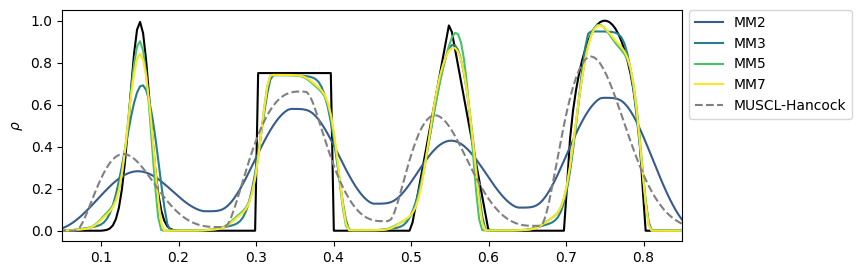

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 3))
ax.set_ylabel(r"$\rho$")

plot_1d_slice(sims[list(sims.keys())[0]], ax, "rho", cell_averaged=True, t=0, color="k")


def cmap(p):
    return plt.get_cmap("viridis")(p / 7)


for name, sim in sims.items():
    if name == "MUSCL-Hancock":
        continue
    plot_1d_slice(sim, ax, "rho", cell_averaged=True, label=name, color=cmap(sim.p))

plot_1d_slice(
    sims["MUSCL-Hancock"],
    ax,
    "rho",
    cell_averaged=True,
    label="MUSCL-Hancock",
    color="grey",
    linestyle="--",
)

ax.legend(loc="lower left", bbox_to_anchor=(1.0, 0.5, 0.5, 0.5))
ax.set_xlim(0.05, 0.85)